# Study Exponential Smoothing on synthetic data

## Takeaways
Not the best tool, since it always seems to look for seasonality.

## Helper functions

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [5]:
def fuzz(d):
    std = np.std(d)
    return d + np.random.uniform(-std/5.0, std/5.0, size=d.size)
fuzz(np.arange(10))

array([-0.48689771,  1.54608268,  2.26504215,  3.16932542,  3.8198161 ,
        4.87192229,  6.31492878,  6.55233888,  8.00370997,  9.17934109])

In [40]:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
def study_prophet(x, y, show_components=False):
    model = SimpleExpSmoothing(y)
    model_fit = model.fit()
    
    x = np.arange(y.size)
    plt.scatter(x, y, marker='x')
    plt.plot(x, arima.predict(n_periods=y.shape[0]))
    plt.title('Actual test samples vs. forecasts')
    plt.show()

In [9]:
date_range = pd.date_range(start='1/1/2018', periods=300, freq='1D')

## Studies

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-629.734, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=648.505, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-343.048, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=327.696, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=646.942, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-384.283, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-350.610, Time=0.20 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-566.110, Time=0.96 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-344.174, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-396.815, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit

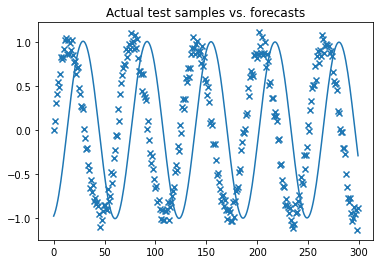

In [41]:
# Sine wave.
study_prophet(date_range, fuzz(np.sin(pd.Series(date_range.values).dt.dayofyear/10.0)))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2428.197, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2359.025, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2427.783, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2327.678, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2317.712, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2297.047, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2283.213, Time=0.17 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=2280.845, Time=0.20 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=2278.478, Time=0.22 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=2276.219, Time=0.12 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=2275.240, Time=0.24 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=2275.500, Time=0.29 sec
 ARIMA(9,1,1)(0,0,0)[0] intercept   : AIC=

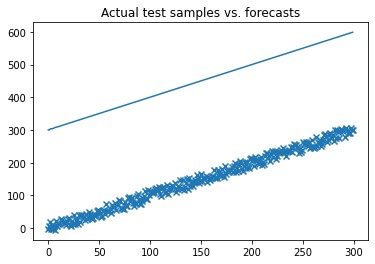

In [42]:
# Strong Trend with random noise.
study_prophet(date_range, fuzz(np.arange(date_range.size)))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3598.999, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3604.491, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3603.044, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3602.976, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3606.377, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3601.610, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.535 seconds


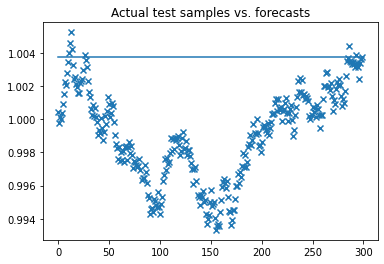

In [43]:
# Random walk with a very slight uptrend.
study_prophet(date_range, (1+np.random.uniform(-.001, .00101, size=date_range.size)).cumprod(), show_components=True)

In [24]:
# Generate a momentum/mean reverting series with moving average.
import statsmodels.tsa.arima_process
def gen_series(arparams, maparams, size):
    ar = np.r_[1, -arparams] # add zero-lag and negate
    ma = np.r_[1, maparams] # add zero-lag
    d = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, size)
    return d


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=836.330, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=834.977, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=836.244, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=836.281, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=833.434, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=838.193, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.410 seconds


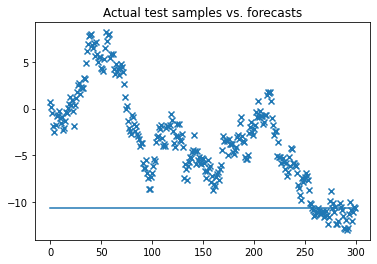

In [44]:
# Momentum.
study_prophet(date_range, gen_series(np.array([1, 0]), np.array([0, 0]), size=date_range.size), 
              show_components=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=848.120, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=849.635, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=849.605, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=846.134, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.847 seconds


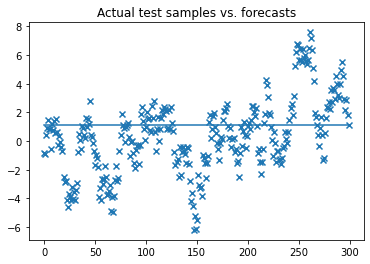

In [35]:
# Mean reverting.
study_prophet(date_range, gen_series(np.array([.95, 0]), np.array([0, 0]), size=date_range.size), 
              show_components=True)